<p style='color:dark green;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>پروژه شماره سه</p>

<p style='color:red;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>سوال اول</p>
<p style='color:dark orange;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>خواندن قیمت ها

In [1]:
import numpy as np

In [2]:
file=open('P3_1.csv','r')
pr_com1=file.read()
pr_com1=pr_com1.split()
pr_com1=list(pr_com1[1::])
price_companies_list1=[]
price_companies_list2=[]
for j in pr_com1:
    price=j.split(',')
    price_companies_list1.append(price)
for i in price_companies_list1:
    price_companies_list2.append(i[1::])
pr_co1=np.array(price_companies_list2)
pr_co2=np.copy(pr_co1) 
display(pr_co1)

array([['571', '428', '578', ..., '160', '520', '327'],
       ['249', '952', '996', ..., '283', '674', '456'],
       ['685', '661', '132', ..., '44', '4', '133'],
       ...,
       ['607', '443', '190', ..., '860', '267', '301'],
       ['213', '400', '232', ..., '139', '662', '427'],
       ['477', '172', '970', ..., '450', '343', '533']], dtype='<U5')

<p style='color:red;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>سوال دوم</p>
<p style='color:dark orange;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>اصلاح قیمت ها</p>

In [3]:
def num_of_na(x):
    n_na=0
    n_na_list=[]
    for i in range(x.shape[0]):
        n_na=0
        for j in range(x.shape[1]):
            if x[i,j]=='N/A':
                n_na+=1
        n_na_list.append(n_na) 
    return(np.array(n_na_list))   

In [4]:
def num_of_outiler(x):    
    x=np.where(x=='N/A','500',x)
    x=x.astype(int)
    mean_arr_r=np.mean(x,axis=1)
    std_arr_r=np.std(x,axis=1)
    std_arr_c=np.std(x,axis=0)
    mean_arr_c=np.mean(x,axis=0)
    list_up_out=[]
    list_down_out=[]
    print(mean_arr_r,std_arr_r)
    for i in range(0,1004):
        up_outiler=mean_arr_r[i]+3*std_arr_r[i]
        down_outiler=mean_arr_r[i]-3*std_arr_r[i]
        list_up_out.append(up_outiler)
        list_down_out.append(down_outiler)    
    up_outiler_arr=np.array(list_up_out)
    down_outiler_arr=np.array(list_down_out)
    n_outiler=0
    n_outiler_list=[]
    for i in range(0,1004):
        for j in range(0,10):
            if x[i][j]>up_outiler_arr[i] or x[i][j]<down_outiler_arr[i] :
                x[i][j]=mean_arr_c[j]
                n_outiler+=1
        n_outiler_list.append(n_outiler)
    return(np.array(n_outiler_list)) 
ar1=num_of_outiler(pr_co1) 
ar1[ar1>0]

[507.9 745.4 499.  ... 417.3 458.3 513.5] [217.65957365 489.3649354  363.39290032 ... 217.37389448 202.97194387
 300.61146019]


array([], dtype=int32)

In [5]:
delete_arr=num_of_outiler(pr_co1)+num_of_na(pr_co1)
new_pr_co1=np.delete(pr_co1,np.where(delete_arr>3),axis=0)
new_pr_co1=np.where(new_pr_co1=='N/A','500',new_pr_co1)
new_pr_co1=new_pr_co1.astype(int)
display(new_pr_co1)
new_pr_co1.shape

[507.9 745.4 499.  ... 417.3 458.3 513.5] [217.65957365 489.3649354  363.39290032 ... 217.37389448 202.97194387
 300.61146019]


array([[571, 428, 578, ..., 160, 520, 327],
       [249, 952, 996, ..., 283, 674, 456],
       [685, 661, 132, ...,  44,   4, 133],
       ...,
       [607, 443, 190, ..., 860, 267, 301],
       [213, 400, 232, ..., 139, 662, 427],
       [477, 172, 970, ..., 450, 343, 533]])

(1003, 10)

<p style='color:red;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>سوال سوم</p>
<p style='color:dark orange;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>نمونه گیری</p>

In [6]:
def mean_10_to_10030(x):    
    list_mean=[]
    for i in range(0,1003):
        mean=np.mean(x[i:,0:])
        list_mean.append(mean)
    list_mean.reverse()
    arr_mean=np.array(list_mean)
    return(arr_mean)

In [7]:
def  std_10_to_10030(x):
    list_std=[]
    for i in range(0,1003):
        std=np.std(x[i:,0:])
        list_std.append(std)
    list_std.reverse()
    arr_std=np.array(list_std)
    return(arr_std)

In [8]:
import matplotlib.pyplot as plt
def line_plot(sample, name):
    plt.plot(range(len(sample)), sample)
    plt.xlabel('Number of Data')
    plt.ylabel('Values')
    plt.legend([name])
    plt.show()

<p style='color:dark blue;font-size:1.2em;text-align:center;direction:rtl;font-family:B koodak'>با افزایش اندازه نمونه نتایج دقیق تر و اختلاف نتایج با هم به حداقل می رسد</p>

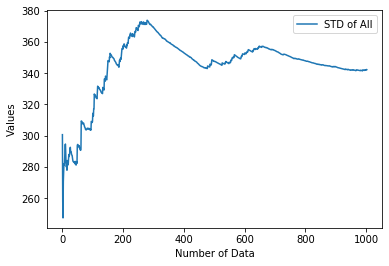

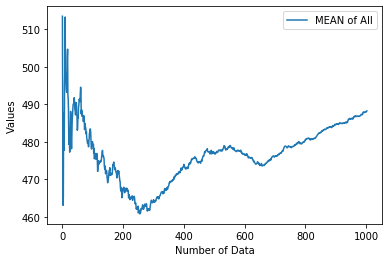

In [9]:
line_plot(std_10_to_10030(new_pr_co1),'STD of All')
line_plot(mean_10_to_10030(new_pr_co1),'MEAN of All')

<p style='color:red;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>سوال جهارم</p>
<p style='color:dark orange;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>همبستگی</p>

In [11]:
import sympy
n,x,y,xbar,ybar,i=sympy.symbols('n,x,y,xbar,ybar,i')
sigma_x=(sympy.Indexed(x,i)-(xbar))
sigma_y=(sympy.Indexed(y,i)-(ybar))
numerator=sympy.Sum((sigma_x*sigma_y),(i,0,n))
denumerator=sympy.sqrt(sympy.Sum((sigma_x**2),(i,0,n))*sympy.Sum((sigma_y**2),(i,0,n)))
r_xy=numerator/denumerator
display(r_xy)
f=sympy.lambdify([x,xbar,y,ybar,n],r_xy)
display(new_pr_co1)
price_list1=[]
corr_list1=[]
for i in range(0,10):    
    price_list1.append(new_pr_co1[0:,i])
for i in price_list1:
    for j in price_list1:
        a=f(i,i.mean(),j,j.mean(),1002)
        corr_list1.append(str(int(a*100)/100))
print(price_list1)        
# import datetime as Dt
# a=Dt.datetime.now()
# comp_str=f'{a},A,B,C,D,E,F,G,H,I,J'
# li1=['\nA','\nB','\nC','\nD','\nE','\nF','\nG','\nH','\nI','\nJ']
# li2=[i for i in range(0,len(corr_list1)+10,11)]
# for i in range(0,10):
#     corr_list1.insert(li2[i],li1[i]) 
# corr_list1.insert(0,comp_str)
# corr=','.join(corr_list1)
# print(corr)
# import os
# os.mkdir('P3_corr')
# os.chdir('C:\\Users\\VAIO\\Desktop\\Numpy\\Project3\\P3_corr')
# file=open('P3_2.csv','w')
# file.write(corr)
# file.close()

Sum((-xbar + x[i])*(-ybar + y[i]), (i, 0, n))/sqrt(Sum((-xbar + x[i])**2, (i, 0, n))*Sum((-ybar + y[i])**2, (i, 0, n)))

array([[571, 428, 578, ..., 160, 520, 327],
       [249, 952, 996, ..., 283, 674, 456],
       [685, 661, 132, ...,  44,   4, 133],
       ...,
       [607, 443, 190, ..., 860, 267, 301],
       [213, 400, 232, ..., 139, 662, 427],
       [477, 172, 970, ..., 450, 343, 533]])

[array([571, 249, 685, ..., 607, 213, 477]), array([428, 952, 661, ..., 443, 400, 172]), array([578, 996, 132, ..., 190, 232, 970]), array([ 206, 2000,  767, ...,  424,  585,  918]), array([813, 860, 982, ..., 643, 683, 428]), array([823, 603, 969, ..., 325, 492,   0]), array([653, 381, 613, ..., 113, 750, 844]), array([160, 283,  44, ..., 860, 139, 450]), array([520, 674,   4, ..., 267, 662, 343]), array([327, 456, 133, ..., 301, 427, 533])]


<p style='color:red;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>سوال پنجم</p>
<p style='color:dark orange;font-size:2.1em;text-align:center;direction:rtl;font-family:B koodak'>انحراف معیار</p>

In [ ]:
n,x,xbar,i=sympy.symbols('n,x,xbar,i')
sigma_x=(sympy.Indexed(x,i)-(xbar))
std=sympy.sqrt((1/(n-1))*sympy.Sum((sigma_x**2),(i,0,n)))
display(std)
f=sympy.lambdify([x,xbar,n],std)
f(new_pr_co1,new_pr_co1.mean(),10)